# CSE-221710310017-GAJJALA MAANSI

#### Assignment Problem Statement:


This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper.
The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?


#### Features:

- TV: Advertising dollars spent on TV for a single product in a given market 
    
- Radio: Advertising dollars spent on Radio
    
- Newspaper: Advertising dollars spent on Newspaper
    
#### Response:

- Sales: sales of a single product in a given market (in thousands of widgets)



### Read the data from the below URL:
 https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv


### 1. Perform all the necessary data preprocessing steps required


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
## Importing the Dataset
data = pd.read_table("Advertising.csv")
data.head()

,",TV,radio,newspaper,sales"
0,"1,230.1,37.8,69.2,22.1"
1,"2,44.5,39.3,45.1,10.4"
2,"3,17.2,45.9,69.3,9.3"
3,"4,151.5,41.3,58.5,18.5"
4,"5,180.8,10.8,58.4,12.9"


In [3]:
## Using seperator as "," to make the data  in a proper structure
data = pd.read_table("Advertising.csv", sep= ",")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
## Remove unnamed column
data.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
data.columns.value_counts()

TV           1
sales        1
newspaper    1
radio        1
dtype: int64

In [8]:
# Checking the total number of missing values
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
# Checking duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

#### There are no duplicate and missing values

In [10]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### 2. Visualize the relationship between the features and the response using scatterplots

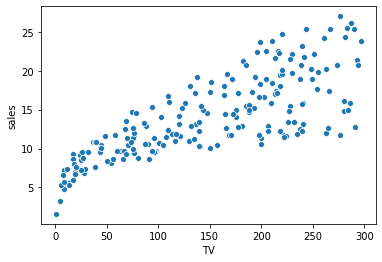

In [12]:
sns.scatterplot("TV","sales",data=data)

#### As the TV ads increased sales also increased

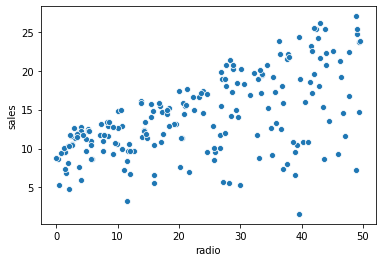

In [13]:
sns.scatterplot("radio","sales",data=data)

#### Mostly the sales increases with the increase of the radio advertisements but sometimes the sales drop with increasing in radio advertisements

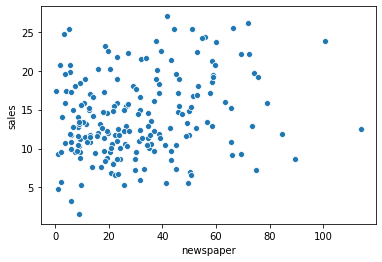

In [14]:
sns.scatterplot("newspaper","sales",data=data)

#### The impact on sales with increase in newspaper advertisements is not clear enough to conclude

### 3. Check for correlation and observe if there is  any multicollinearity.


In [15]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


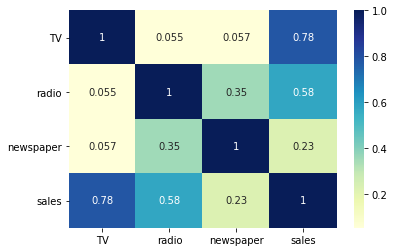

In [16]:
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [17]:
correlation=data.corr()
cor=correlation[correlation>0.5]
cor

,TV,radio,newspaper,sales
TV,1.000000,NaN,NaN,0.782224
radio,NaN,1.000000,NaN,0.576223
newspaper,NaN,NaN,1.0,NaN
sales,0.782224,0.576223,NaN,1.000000


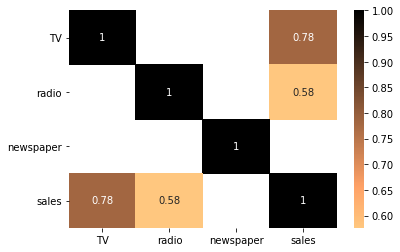

In [19]:
sns.heatmap(cor,annot=True,cmap='copper_r')

### 4. After building a Linear Regression Model, write down the interpretation of the model


In [20]:
x=data.drop(columns=['sales'])
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [21]:
y=data[['sales']]
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


### 5. Find out how well does the model fit the data?


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150, 1)
(50, 1)


In [25]:
#Intercept and the coefficient values
print(lm.intercept_)
lm.coef_

[2.89257005]


array([[0.04416235, 0.19900368, 0.00116268]])

In [26]:
y_train_pred=lm.predict(X_train)
y_train_pred

array([[10.62420524],
       [19.5419182 ],
       [18.37463236],
       [15.26284415],
       [10.02487307],
       [ 8.17260763],
       [21.50975323],
       [14.14823568],
       [16.30996795],
       [ 8.85509348],
       [15.23153021],
       [12.32242242],
       [13.64852005],
       [14.17607882],
       [18.40185911],
       [19.24193422],
       [20.24381109],
       [17.44505298],
       [ 9.24109062],
       [11.75336116],
       [19.79642606],
       [ 9.80950414],
       [20.80042258],
       [23.32343742],
       [10.13147045],
       [17.3137333 ],
       [19.53122711],
       [18.50680928],
       [16.84593627],
       [18.57944535],
       [17.06456086],
       [ 8.86557659],
       [ 9.96958118],
       [ 5.33193027],
       [ 3.58046283],
       [16.57691776],
       [12.86700495],
       [18.07899796],
       [11.79508257],
       [12.56748077],
       [13.73208519],
       [ 6.99405932],
       [16.59518043],
       [ 9.77789051],
       [ 8.03719883],
       [15

In [27]:
y_train_pred == y_train

,sales
71,False
124,False
184,False
97,False
149,False
...,...
67,False
192,False
117,False
47,False


In [28]:
y_test_pred=lm.predict(X_test)
y_test_pred

array([[10.0494569 ],
       [ 7.43052335],
       [ 6.97152143],
       [24.16378667],
       [12.00215643],
       [ 6.54334645],
       [13.09526331],
       [14.95879164],
       [11.00528358],
       [16.27234553],
       [22.99324688],
       [ 9.12188347],
       [10.33545333],
       [15.39628185],
       [11.60589932],
       [12.11484332],
       [18.60251172],
       [10.81414474],
       [16.07541355],
       [17.22753644],
       [24.2342995 ],
       [ 9.47711838],
       [15.13960412],
       [12.41064749],
       [ 5.67814427],
       [15.22889947],
       [12.21635459],
       [20.94370559],
       [13.28068231],
       [ 9.16578351],
       [13.30285718],
       [21.5770033 ],
       [18.098111  ],
       [21.15572322],
       [ 6.69734039],
       [ 6.15355714],
       [ 7.96280151],
       [13.09426248],
       [14.81032968],
       [ 6.22020075],
       [12.2799744 ],
       [ 9.1817324 ],
       [15.04882696],
       [16.26091437],
       [17.16859664],
       [13

In [29]:
y_test_pred == y_test

,sales
18,False
170,False
107,False
98,False
177,False
182,False
5,False
146,False
12,False
152,False


In [30]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [31]:
# For Training Data
print('R^2: ',r2_score(y_train,y_train_pred))
print("Adjusted R^2 value:",1-(1-r2_score(y_train,y_train_pred))*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train,y_train_pred))
print('MSE:',mean_squared_error(y_train,y_train_pred))
print('RMSE',np.sqrt(mean_squared_error(y_train,y_train_pred)))

R^2:  0.9072183330817297
Adjusted R^2 value: 0.9053118604738201
MAE: 1.2248611099616427
MSE: 2.438917493390848
RMSE 1.5617033948195311


In [32]:
# For Test Data
print('R^2: ',r2_score(y_test,y_test_pred))
print("Adjusted R^2 value:",1-(1-r2_score(y_test,y_test_pred))*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test,y_test_pred))
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2:  0.8576396745320894
Adjusted R^2 value: 0.8483553054798344
MAE: 1.3000320919235446
MSE: 4.012497522917096
RMSE 2.00312194409554
